**Initialisation Stage**

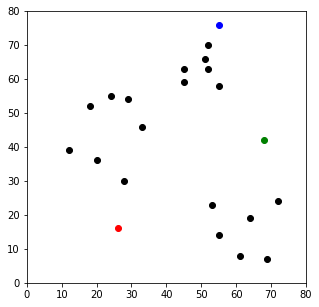

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

np.random.seed(200)
k = 3
centroids = {}                  # centroids[i] = [x, y]
for i in range(k):
    centroids[i+1] = [np.random.randint(0, 80), np.random.randint(0, 80)]
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

**Assignment Stage**

     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  36        20.880613        48.373546        53.150729        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
4   29  54        38.118237        40.804412        34.058773        3     b
5   33  46        30.805844        35.227830        37.202150        1     r
6   24  55        39.051248        45.880279        37.443290        3     b
7   45  59        47.010637        28.600699        19.723083        3     b
8   45  63        50.695167        31.144823        16.401219        3     b
9   52  70        59.933296        32.249031         6.708204        3     b
10  51  66        55.901699        29.410882        10.770330        3     b
11  52  63        53.712196        26.400758        13.341664        3     b

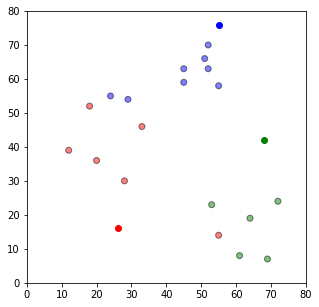

In [2]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = ( np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2))
             
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
df = assignment(df, centroids)
print(df)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [3]:
# working of idxmin() and map()

np.random.seed(100)
row=np.random.randint(2,100,10)
column=np.random.randint(2,100,10)
dff=pd.DataFrame({"data_1":row,"data_2":column})
dff['closest'] = dff.loc[:,:].idxmin(axis=1)
print(dff)
dff['closest'] = dff['closest'].map(lambda x: int(x.lstrip('data_')))
dff

   data_1  data_2 closest
0      10      68  data_1
1      26      16  data_2
2      69      36  data_2
3      89      26  data_2
4      81      17  data_2
5      50      62  data_1
6      12      60  data_1
7      96      18  data_2
8      54      11  data_2
9      55      95  data_1


,data_1,data_2,closest
0,10,68,1
1,26,16,2
2,69,36,2
3,89,26,2
4,81,17,2
5,50,62,1
6,12,60,1
7,96,18,2
8,54,11,2
9,55,95,1


**Update Stage**

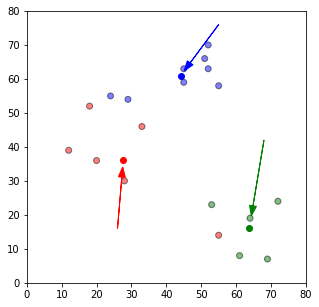

In [4]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
#print("centroids:",centroids)    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

**Repeat Assigment Stage**

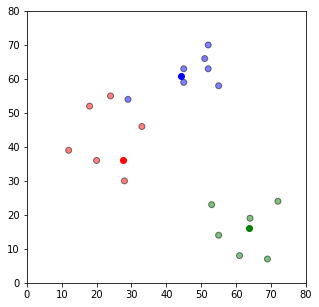

In [5]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

**Continue until all assigned categories don't change any more**

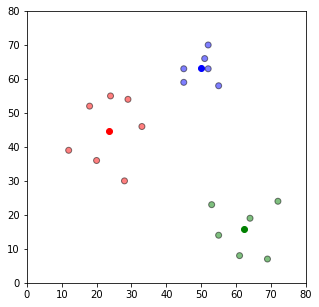

In [6]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        #print ("centroids:",centroids)
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Direct Method

In [7]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

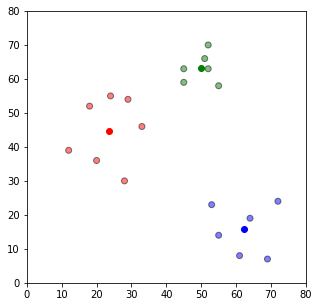

In [8]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
#print(centroids)
#print("labels:",labels)
fig = plt.figure(figsize=(5, 5))
colors = map(lambda x: colmap[x+1],labels)
colors=[i  for i in colors]   
#print (colors)
plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    #print(idx)
    #print(centroid)
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

**We get the exact same result, albeit with the colours in a different order.**

**Some things to take note of though:**

k-means clustering is very sensitive to scale due to its reliance on Euclidean distance so be sure to normalize data if there are likely to be scaling problems.

If there are some symmetries in your data, some of the labels may be mis-labelled

It is recommended to do the same k-means with different initial centroids and take the most common label.

# K-Means clustering of Iris Data

In [10]:
iris=pd.read_csv("iris.data")
iris.columns = ['SL', 'SW', 'PL', 'PW','Class']
iris=iris.drop(['Class','PL','PW'],axis=1)
iris

,SL,SW
0,4.9,3.0
1,4.7,3.2
2,4.6,3.1
3,5.0,3.6
4,5.4,3.9
...,...,...
144,6.7,3.0
145,6.3,2.5
146,6.5,3.0
147,6.2,3.4


In [11]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

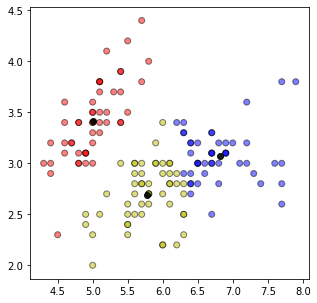

In [12]:
label=kmeans.predict(iris)
#print(label)
centers=kmeans.cluster_centers_
#print(centers)
fig = plt.figure(figsize=(5, 5))
colormap={0:'r',1:'b',2:'y'}
colours = map(lambda x: colormap[x],label)
colours=[i for i in colours]
#print(colours)
plt.scatter(iris['SL'], iris['SW'], color=colours, alpha=0.5, edgecolor='k')
for idx,center in enumerate(centers):
    #print(idx)
    #print(center)
    plt.scatter(*center,color='k',alpha=0.9)
# # plt.xlim(4,8)
# # plt.ylim(1,5)
plt.show()